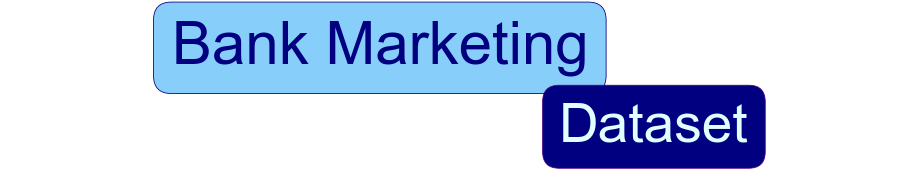

In [1]:
# Computations
import pandas as pd
import numpy as np
import calendar

# sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn 
import torchvision.transforms as transforms

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex

## progress bar
import progressbar

## seaborn
import seaborn as sns
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':14,'axes.labelsize':12})
sns.set_style('white')

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


fig, ax = plt.subplots(1, 1, figsize= (16,3))
_ = ax.text(0.4, .8, "Bank Marketing", color = 'Navy', size=60, rotation=0.,ha="center", va="center",
            bbox=dict(boxstyle="round", ec='Navy',fc='LightSkyBlue'))

_ = ax.text(.9, .4, "Dataset", size=55, color = 'LightCyan', rotation=0.,ha="right", va="top",
            bbox=dict(boxstyle="round",ec='Indigo',fc='Navy'))
_ = ax.axis('tight')
_ = ax.axis('off')

<div class="alert alert-block alert-info">
<font size="+2"><b>
Bank Marketing Dataset    
</b></font>
</div>

In this article, we work on a dataset available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

This dataset is based on "Bank Marketing" UCI dataset (please check the description at [archive.ics.uci.edu/ml/datasets/Bank+Marketing](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)). The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at:  [bportugal.pt/estatisticasweb](https://www.bportugal.pt/estatisticasweb). This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 


## Dataset Information:
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with fewer inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with fewer inputs).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Loading the Dataset

The zip file includes two datasets: 
1. bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
2. bank-additional.csv with 10% of the examples (4119), randomly selected from **bank-additional-full.csv**.
The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

In [2]:
Data = pd.read_csv('Data/Bank_mod.csv')
display(Data.head().round(2))

Age        Job  Marital    Education  Default Housing Loan    Contact  \
0   56  Housemaid  Married     Basic.4Y       No      No   No  Telephone   
1   57   Services  Married  High.School  Unknown      No   No  Telephone   
2   37   Services  Married  High.School       No     Yes   No  Telephone   
3   40     Admin.  Married     Basic.6Y       No      No   No  Telephone   
4   56   Services  Married  High.School       No      No  Yes  Telephone   

  Month Day Of Week  ...  Campaign  Pdays  Previous     Poutcome  \
0   May      Monday  ...         1    999         0  Nonexistent   
1   May      Monday  ...         1    999         0  Nonexistent   
2   May      Monday  ...         1    999         0  Nonexistent   
3   May      Monday  ...         1    999         0  Nonexistent   
4   May      Monday  ...         1    999         0  Nonexistent   

  Employment Variation Rate  Consumer Price Index  Consumer Confidence Index  \
0                       1.1                 93.99                      -36.4   
1                       1.1                 93.99                      -36.4   
2                       1.1                 93.99                      -36.4   
3                       1.1                 93.99                      -36.4   
4                       1.1                 93.99                      -36.4   

   Euribor three Month Rate  Number of Employees  Term Deposit Subscription  
0                      4.86               5191.0                         No  
1                      4.86               5191.0                         No  
2                      4.86               5191.0                         No  
3                      4.86               5191.0                         No  
4                      4.86               5191.0                         No  

[5 rows x 21 columns]

| Number of Instances | Number of Attributes |
|---------------------|----------------------|
| 41188               | 21                   |


### Bank Client Data

| Feature   | Description                                                                                                                                                                  |
|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Age       | numeric                                                                                                                                                                      |
| Job       | Type of Job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
| Marital   | marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)                                                            |
| Education | (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")                                               |
| Default   | has credit in default? (categorical: "no","yes","unknown")                                                                                                                   |
| Housing   | has housing loan? (categorical: "no","yes","unknown")                                                                                                                        |
| Loan      | has personal loan? (categorical: "no","yes","unknown")                                                                                                                       |

### Related with the Last Contact of the Current Campaign

| Feature     | Description                                                                                                                                                                                                                                                                                                                                                                                                         |
|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Contact     | contact communication type (categorical: "cellular","telephone")                                                                                                                                                                                                                                                                                                                                                    |
| Month       | last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")                                                                                                                                                                                                                                                                                                                                    |
| Day of week | last contact day of the week (categorical: "mon","tue","wed","thu","fri")                                                                                                                                                                                                                                                                                                                                           |
| Duration    | last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |

### Other Attributes

| Feature  | Description                                                                                                                                         |
|----------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| Campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                              |
| Pdays    | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| Previous | number of contacts performed before this campaign and for this client (numeric)                                                                     |
| Poutcome | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")                                                         |


### Social and Economic Context Attributes

| Feature        | Description                                               |
|----------------|-----------------------------------------------------------|
| Employment Variation Rate   | employment variation rate - quarterly indicator (numeric) |
| Consumer Price Index | consumer price index - monthly indicator (numeric)        |
| Consumer Confidence Index  | consumer confidence index - monthly indicator (numeric)   |
| Euribor three Month Rate      | euribor* 3 month rate - daily indicator (numeric)          |
| Number of Employees    | number of employees - quarterly indicator (numeric)       |

```* the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.```

### Output variable (Desired Target):

| Feature | Description                                                    |
|---------|----------------------------------------------------------------|
| Term Deposit Subscription       | has the client Term Deposit Subscription? (binary: "yes","no") |

In [3]:
Dataset_Subcategories = {}
Dataset_Subcategories['Bank Client Data'] = Data.iloc[:,:7].columns.tolist()
Dataset_Subcategories['Related with the Last Contact of the Current Campaign'] = Data.iloc[:,7:11].columns.tolist()
Dataset_Subcategories['Other Attributes'] = Data.iloc[:,11:15].columns.tolist()
Dataset_Subcategories['Social and Economic Context Attributes'] = Data.iloc[:,15:-1].columns.tolist()
Dataset_Subcategories['Output variable (Desired Target)'] = Data.iloc[:,-1:].columns.tolist()

# Modeling

In [4]:
def List_Print(Text, List):
    print(Back.BLACK + Fore.CYAN + Style.NORMAL + '%s:' % Text + Style.RESET_ALL + ' %s' % ', '.join(List))

## Categorical Variables

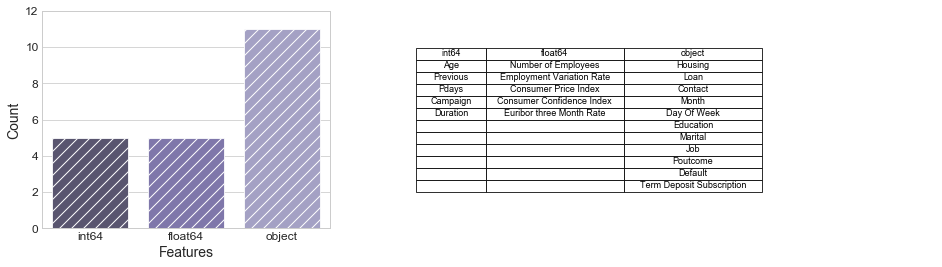

In [5]:
def Data_info(Inp, Only_NaN = False):
    Out = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = Out.join(Inp.isnull().sum().to_frame(name = 'Number of NaN Values'), how='outer')
    Out ['Size'] = Inp.shape[0]
    Out['Percentage'] = np.round(100*(Out['Number of NaN Values']/Inp.shape[0]),2)
    Out.index.name = 'Features'
    if Only_NaN:
        Out = Out.loc[Out['Number of NaN Values']>0]
    return Out

def dtypes_group(Inp):
    dType = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = pd.DataFrame(index =dType['Data Type'].unique(), columns = ['Columns','Count'])
    for c in dType['Data Type'].unique():
        Out.loc[Out.index == c, 'Columns'] = [dType.loc[dType['Data Type'] == c].index.tolist()]
        Out.loc[Out.index == c, 'Count'] = len(dType.loc[dType['Data Type'] == c].index.tolist())
    Out.index.name = 'Features'
    return Out

dType = dtypes_group(Data)
dType.reset_index(drop = False, inplace =True)
dType['Features'] = dType['Features'].astype(str)

Temp = pd.DataFrame(np.zeros((dType.Count.max(), dType.shape[0]), dtype = str), columns = dType.Features)
for c in Temp.columns:
    Temp[c][:dType.loc[dType.Features == c, 'Count'].values[0]] = dType.loc[dType.Features == c, 'Columns'].values[0]

fig = plt.figure(figsize=(16, 4), constrained_layout=True)
gs = fig.add_gridspec(1, 4)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1:])
_ = sns.barplot(x="Features", y="Count" , palette="Purples_d", hatch = '//', data = dType, ax = ax0)
_ = ax0.set_ylim([0,12])

_ = ax1.table(cellText=Temp.values, colLabels=Temp.columns, loc='center',
              colWidths  = [0.1,.2,.2], cellLoc  = 'center', fontsize = 14)
_ = ax1.axis('tight')
_ = ax1.axis('off')
plt.subplots_adjust(wspace=-0.3)

### Yes/No Features

First, let's convert all Yes/No columns using as follows

$$\begin{cases} -1 & \mbox{Unknown}\\0 &\mbox{No}\\ 1 &\mbox{Yes}\end{cases}$$

In [6]:
df = Data.copy()
Categorical_Variables = dType.loc[dType['Features'] == 'object'].values[0,1]
YN_Feat = []
for c in Categorical_Variables:
    s = set(df[c].unique().tolist())
    if s.issubset({'No', 'Yes', 'Unknown'}):
        YN_Feat.append(c)
del c, s
List_Print('Yes/No Features', YN_Feat)

# Converting:
Temp = {'Yes':1, 'No':0, 'Unknown':-1}
for c in YN_Feat:
    df[c] = df[c].replace(Temp).astype(int)    
del c
display(df[YN_Feat].head().style.hide_index())

## Adding these keys and values to a dictionary
CatVar_dict = {}
for c in YN_Feat:
    CatVar_dict[c] = Temp
    
#substracting YN Features from Categorical_Variables
Categorical_Variables = list(set(Categorical_Variables) - set(YN_Feat))
del YN_Feat, Temp

Yes/No Features: Housing, Loan, Default, Term Deposit Subscription


Moreover,

In [7]:
List_Print('Remaining categorical features', Categorical_Variables)

Remaining categorical features: Day Of Week, Education, Poutcome, Contact, Marital, Job, Month


### Poutcome

For these features, we have,

$$\mbox{Poutcome} = \begin{cases} -1 & \mbox{Nonexistent}\\0 &\mbox{Failure}\\ 1 &\mbox{Success}\end{cases}$$

In [8]:
Temp = {'Success':1, 'Failure':0, 'Nonexistent':-1}
df['Poutcome'] = df['Poutcome'].replace(Temp).astype(int)  
CatVar_dict['Poutcome'] = Temp
del Temp

### Marital

$$\mbox{Poutcome} = \begin{cases} -1 & \mbox{Unknown}\\0 &\mbox{Single}\\ 1 &\mbox{Married}\\ 2 &\mbox{Divorced}\end{cases}$$

In [9]:
Temp = {'Divorced':2, 'Married':1, 'Single':0, 'Unknown':-1}
df['Marital'] = df['Marital'].replace(Temp).astype(int)  
CatVar_dict['Marital'] = Temp

### Day Of Week

$$\mbox{Day Of Week} =
\begin{cases}
0 & \mbox{Monday}\\
1 &\mbox{Tuesday}\\
2 &\mbox{Wednesday}\\
3 &\mbox{Thursday}\\
4 &\mbox{Friday}\\
5 &\mbox{Saturday}\\
6 &\mbox{Sunday}
\end{cases}$$

In [10]:
Temp = [x for x in calendar.day_name]
Temp0 = {}
for x in np.arange(len(Temp)):
    Temp0[Temp[x]] = x
del Temp
df['Day Of Week'] = df['Day Of Week'].replace(Temp0).astype(int)  
CatVar_dict['Day Of Week'] = Temp0

### Contact

$$\mbox{Contact} =
\begin{cases}
0 & \mbox{Telephone}\\
1 &\mbox{Cellular}
\end{cases}$$

In [11]:
Temp = {'Telephone':0, 'Cellular':1}
df['Contact'] = df['Contact'].replace(Temp).astype(int)  
CatVar_dict['Contact'] = Temp

### Job

In [12]:
Temp = {'Unknown':-1, 'Unemployed':0, 'Student': 1, 'Housemaid':2, 
        'Retired':3, 'Blue-Collar':4, 'Self-Employed': 5, 'Services':6,
        'Technician':7, 'Admin.':8, 'Management':9, 'Entrepreneur':10 }
df['Job'] = df['Job'].replace(Temp).astype(int)  
CatVar_dict['Job'] = Temp

### Month

In [13]:
Temp = [x for x in calendar.month_name]
Temp = Temp[1:]
Temp0 = {}
for x in np.arange(len(Temp)):
    Temp0[Temp[x]] = x
del Temp

df['Month'] = df['Month'].replace(Temp0).astype(int)  
CatVar_dict['Month'] = Temp0

### Education

In [14]:
Temp = {'Unknown':-1, 'Illiterate':0, 'Basic.4Y':1, 'Basic.6Y':2, 'Basic.9Y':3, 'High.School':4,
        'Professional.Course':5,  'University.Degree':6}
df['Education'] = df['Education'].replace(Temp).astype(int)  
CatVar_dict['Education'] = Temp

Categorical_Variables = CatVar_dict
del CatVar_dict

### Pdays

In [15]:
df.loc[df['Pdays'] == 999, 'Pdays'] = -1

### Age Group and Age Category

Creating new features:

* **Age Group**
* **Age Category**

We can create Age Categories using [**statcan.gc.ca**](https://www.statcan.gc.ca/eng/concepts/definitions/age2).

| Interval          | Age Category | Age Category Code |
|-------------------|--------------|-------------------|
| 00-14 years       | Children     | 0                 |
| 15-24 years       | Youth        | 1                 |
| 25-64 years       | Adults       | 2                 |
| 65 years and over | Seniors      | 3                 |

In [16]:
bins = pd.IntervalIndex.from_tuples([(14, 24), (24, 64),(64, 100)])
Temp = pd.cut(df['Age'], bins)
df['Age'] = Temp.astype(str).replace({'(14, 24]':0, '(24, 64]':1,'(64, 100]':2})

Therefore,

In [17]:
display(df.head())

Age  Job  Marital  Education  Default  Housing  Loan  Contact  Month  \
0    1    2        1          1        0        0     0        0      4   
1    1    6        1          4       -1        0     0        0      4   
2    1    6        1          4        0        1     0        0      4   
3    1    8        1          2        0        0     0        0      4   
4    1    6        1          4        0        0     1        0      4   

   Day Of Week  ...  Campaign  Pdays  Previous  Poutcome  \
0            0  ...         1     -1         0        -1   
1            0  ...         1     -1         0        -1   
2            0  ...         1     -1         0        -1   
3            0  ...         1     -1         0        -1   
4            0  ...         1     -1         0        -1   

   Employment Variation Rate  Consumer Price Index  Consumer Confidence Index  \
0                        1.1                93.994                      -36.4   
1                        1.1                93.994                      -36.4   
2                        1.1                93.994                      -36.4   
3                        1.1                93.994                      -36.4   
4                        1.1                93.994                      -36.4   

   Euribor three Month Rate  Number of Employees  Term Deposit Subscription  
0                     4.857               5191.0                          0  
1                     4.857               5191.0                          0  
2                     4.857               5191.0                          0  
3                     4.857               5191.0                          0  
4                     4.857               5191.0                          0  

[5 rows x 21 columns]

In [18]:
def Data_info(Inp, Only_NaN = False):
    Out = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = Out.join(Inp.isnull().sum().to_frame(name = 'Number of NaN Values'), how='outer')
    Out ['Size'] = Inp.shape[0]
    Out['Percentage'] = np.round(100*(Out['Number of NaN Values']/Inp.shape[0]),2)
    Out.index.name = 'Features'
    if Only_NaN:
        Out = Out.loc[Out['Number of NaN Values']>0]
    return Out

Data_info(df).iloc[:,:1]

Data Type
Features                           
Age                           int64
Campaign                      int64
Consumer Confidence Index   float64
Consumer Price Index        float64
Contact                       int32
Day Of Week                   int32
Default                       int32
Duration                      int64
Education                     int32
Employment Variation Rate   float64
Euribor three Month Rate    float64
Housing                       int32
Job                           int32
Loan                          int32
Marital                       int32
Month                         int32
Number of Employees         float64
Pdays                         int64
Poutcome                      int32
Previous                      int64
Term Deposit Subscription     int32

## Modeling: Logistic Regression

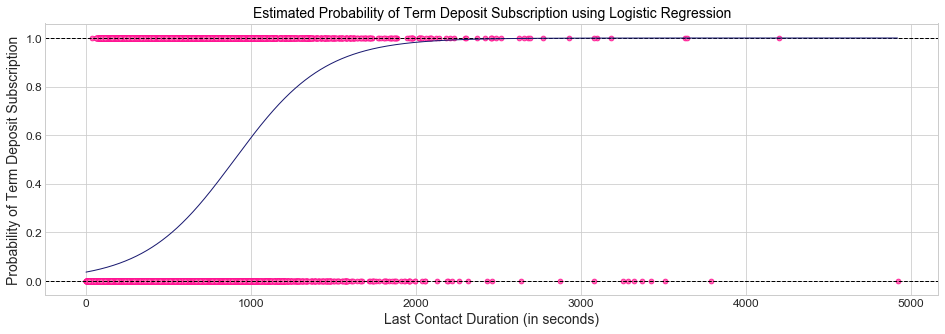

In [19]:
Target = 'Term Deposit Subscription'

Feat = 'Duration'
X = df[Feat].values.reshape(-1,1)
Test = np.arange(df[Feat].min(), df[Feat].max()).reshape(-1,1)
y = df[Target].values.reshape(-1,1)
logr = LogisticRegression(solver='newton-cg')
_ = logr.fit(X, y)
Pred_Prop = logr.predict_proba(Test)

fig, ax = plt.subplots(1, 1, figsize=(16,5))

# Right plot
_ = ax.scatter(X, y, color='HotPink', edgecolor = 'DeepPink')
_ = ax.plot(Test, Pred_Prop[:,1], color='MidnightBlue', lw = 1)
Temp = ax.get_xlim()
_ = ax.hlines(0, Temp[0], Temp[1], linestyles='dashed', lw=1)
_ = ax.hlines(1, Temp[0], Temp[1], linestyles='dashed', lw=1)
_ = ax.set_xlim(Temp)
_ = ax.set_xlabel('Last Contact Duration (in seconds)')
_ = ax.set_ylabel('Probability of %s' % Target)
_ = ax.set_title('Estimated Probability of %s using Logistic Regression' % Target )

del X, Test, y, logr, Pred_Prop, Temp

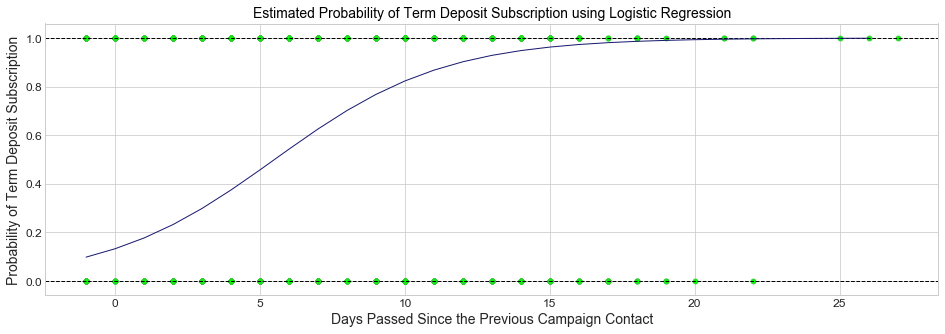

In [20]:
Target = 'Term Deposit Subscription'

Feat = 'Pdays'
X = df[Feat].values.reshape(-1,1)
Test = np.arange(df[Feat].min(), df[Feat].max()).reshape(-1,1)
y = df[Target].values.reshape(-1,1)
logr = LogisticRegression(solver='newton-cg')
_ = logr.fit(X, y)
Pred_Prop = logr.predict_proba(Test)

fig, ax = plt.subplots(1, 1, figsize=(16,5))

# Right plot
_ = ax.scatter(X, y, color='Lime', edgecolor = 'LimeGreen', lw = 1)
_ = ax.plot(Test, Pred_Prop[:,1], color='MidnightBlue', lw = 1)
Temp = ax.get_xlim()
_ = ax.hlines(0, Temp[0], Temp[1], linestyles='dashed', lw=1)
_ = ax.hlines(1, Temp[0], Temp[1], linestyles='dashed', lw=1)
_ = ax.set_xlim(Temp)
_ = ax.set_xlabel('Days Passed Since the Previous Campaign Contact')
_ = ax.set_ylabel('Probability of %s' % Target)
_ = ax.set_title('Estimated Probability of %s using Logistic Regression' % Target )

del X, Test, y, logr, Pred_Prop, Temp

## Data Correlations

Let's take a look at the variance of the features.

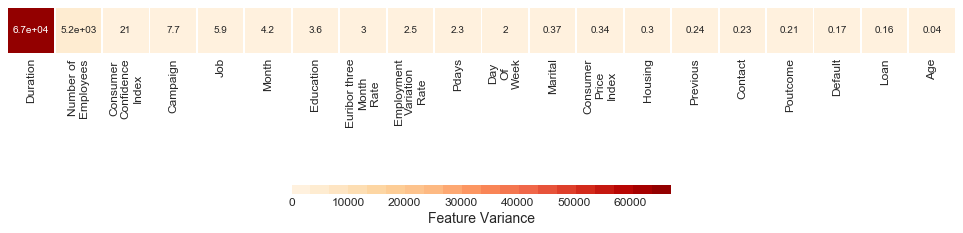

In [21]:
Fig, ax = plt.subplots(figsize=(17,16))
Temp = df.drop(columns = [Target]).var().sort_values(ascending = False).to_frame(name= 'Variance').round(2).T

_ = sns.heatmap(Temp, ax=ax, annot=True, square=True,  cmap =sns.color_palette("OrRd", 20),
                  linewidths = 0.8, vmin=0, vmax=Temp.max(axis =1)[0],
                  cbar_kws={'label': 'Feature Variance', "aspect":40, "shrink": .4, "orientation": "horizontal"})
labels = [x.replace(' ','\n').replace('Euribor\nthree','Euribor three').replace('\nof\n',' of\n')
          for x in [item.get_text() for item in ax.get_xticklabels()]]
_ = ax.set_xticklabels(labels)
_ = ax.set_yticklabels('')

Furthermore, we would like to standardize features by removing the mean and scaling to unit variance. In this article, we demonstrated the benefits of scaling data using [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

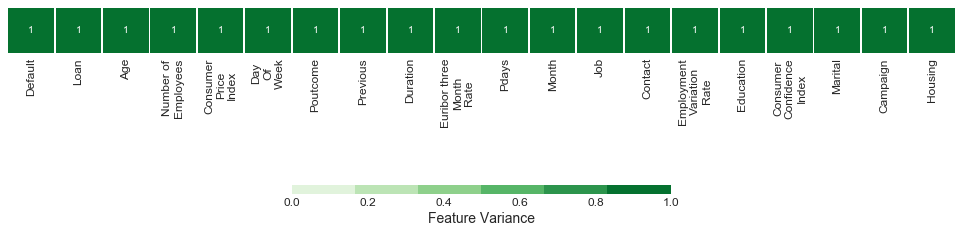

In [22]:
# Scaling
Temp = df.drop(columns = Target).columns.tolist()
scaler = StandardScaler()
_ = scaler.fit(df[Temp])
df[Temp] = scaler.transform(df[Temp])

# Variance Plot
Fig, ax = plt.subplots(figsize=(17,16))
Target = 'Term Deposit Subscription'
Temp = df.drop(columns = [Target]).var().sort_values(ascending = False).to_frame(name= 'Variance').round(2).T

_ = sns.heatmap(Temp, ax=ax, annot=True, square=True,  cmap =sns.color_palette('Greens'),
                  linewidths = 0.8, vmin=0, vmax=Temp.max(axis =1)[0],
                  cbar_kws={'label': 'Feature Variance', "aspect":40, "shrink": .4, "orientation": "horizontal"})
labels = [x.replace(' ','\n').replace('Euribor\nthree','Euribor three').replace('\nof\n',' of\n')
          for x in [item.get_text() for item in ax.get_xticklabels()]]
_ = ax.set_xticklabels(labels)
_ = ax.set_yticklabels('')

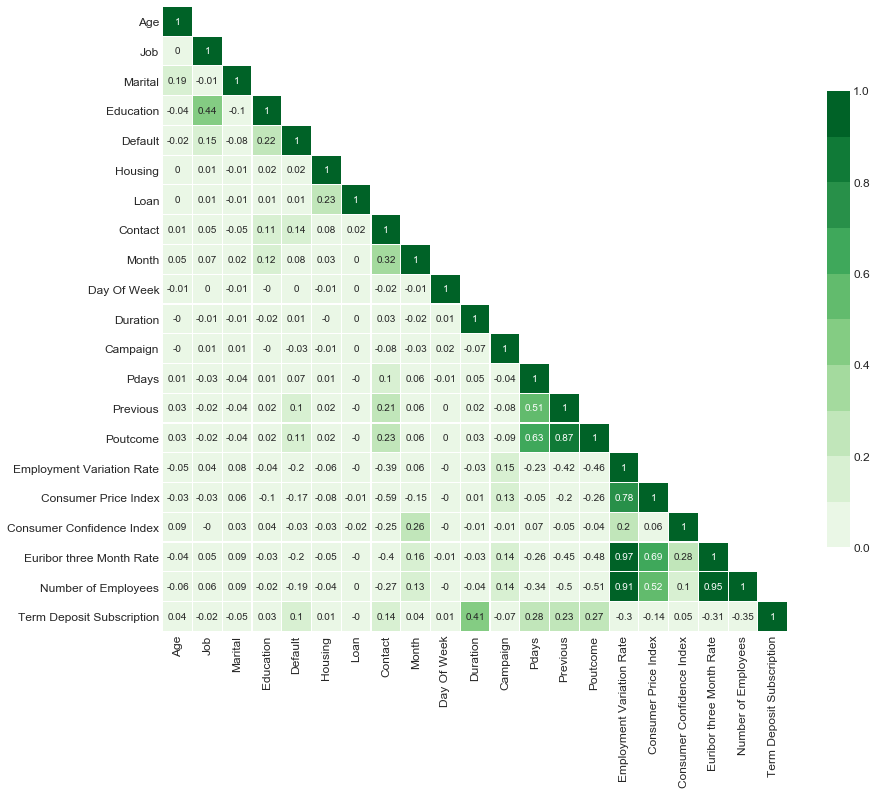

In [23]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr().round(2)
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("Greens", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .6})
    
Correlation_Plot (df, Fig_Size = 14)

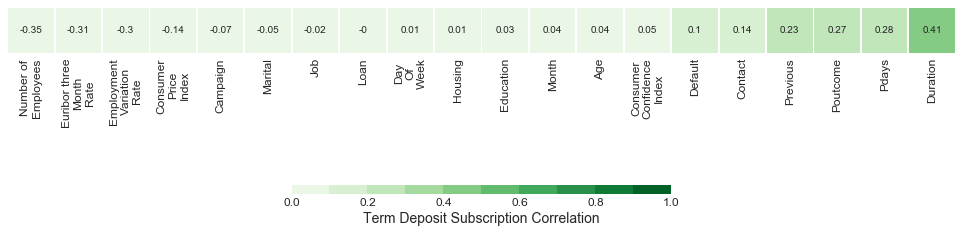

In [24]:
Fig, ax = plt.subplots(figsize=(17,16))
Temp = df.corr().round(2)
Temp = Temp.loc[(Temp.index == Target)].drop(columns = Target).T.sort_values(by = Target).T
_ = sns.heatmap(Temp, ax=ax, annot=True, square=True,  cmap =sns.color_palette("Greens", n_colors=10),
                linewidths = 0.8, vmin=0, vmax=1,
#                 annot_kws={"size": 12.5},
                cbar_kws={'label': Target + ' Correlation', "aspect":40, "shrink": .4, "orientation": "horizontal"})
labels = [x.replace(' ','\n').replace('Euribor\nthree','Euribor three').replace('\nof\n',' of\n')
          for x in [item.get_text() for item in ax.get_xticklabels()]]
_ = ax.set_xticklabels(labels)
_ = ax.set_yticklabels('')

## Train and Test Sets

In [25]:
X = df.drop(columns = Target).values
y = df[Target].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
               'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).set_index('Set').T

Set        X_train       X_test   y_train    y_test
Shape  (28831, 20)  (12357, 20)  (28831,)  (12357,)

## PyTorch Logistic Regression with GPU

We would like to try the logistic regression iteratively using an optimization algorithm. The algorithm at each iteration uses the [Cross-Entropy Loss](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) to measure the loss, and then the gradient and the model update is calculated. At the end of this iterative process, we would reach a better level of agreement between test and predicted sets since the error would be lower from that of the first step.

### Setting up Tensor Arrays

In [26]:
if torch.cuda.is_available():
    X_train_tensor = Variable(torch.from_numpy(X_train).cuda())
    y_train_tensor = Variable(torch.from_numpy(y_train).type(torch.LongTensor).cuda())
    X_test_tensor = Variable(torch.from_numpy(X_test).cuda())
    y_test_tensor = Variable(torch.from_numpy(y_test).type(torch.LongTensor).cuda())
else:
    X_train_tensor = Variable(torch.from_numpy(X_train))
    y_train_tensor = Variable(torch.from_numpy(y_train).type(torch.LongTensor))
    X_test_tensor = Variable(torch.from_numpy(X_test))
    y_test_tensor = Variable(torch.from_numpy(y_test).type(torch.LongTensor))
    
Batch_size = 100
iteration_number = 5e3

epochs_number = int(iteration_number / (len(X_train) / Batch_size))

# Pytorch train and test sets
Train_set = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
Test_set = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

# data loader
train_loader = torch.utils.data.DataLoader(Train_set, batch_size = Batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(Train_set, batch_size = Batch_size, shuffle = False)

del X_train_tensor, y_train_tensor, y_test_tensor, Train_set, Test_set

### Modeling

In [27]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self, input_Size, output_Size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_Size, output_Size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_Size, output_Size = len(X[0]), len(np.unique(y))

# model
model = LogisticRegressionModel(input_Size, output_Size)

# GPU
if torch.cuda.is_available():
    model.cuda()

# Cross Entropy Loss 
CEL= nn.CrossEntropyLoss()

# Optimizer 
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Traning the Model
Count = 0
loss_list = []
Iteration_list = []
Accuracy_list = []
Steps = 50

Progress_Bar = progressbar.ProgressBar(maxval= iteration_number + 200,
                                       widgets=[progressbar.Bar('=', '|', '|'),
                                                progressbar.Percentage()])
# print('---------------------------------------------------------')
for epoch in range(epochs_number):
    for i, (X_train, y_train) in enumerate(train_loader):
        
        # Variables
        X_train = Variable(X_train.view(-1, X[0].shape[0]))
        y_train = Variable(y_train)
        
        # Set all gradients to zero
        optimizer.zero_grad()
        
        # Forward
        Out = model(X_train.float())
        
        # CEL
        loss = CEL(Out, y_train.long())
        
        # Backward (Calculating the gradients)
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        Count += 1
        
        # Predictions
        if Count % Steps == 0:
            # Calculate Accuracy         
            Correct, Total = 0, 0
            # Predictions
            for X_test, y_train in test_loader: 
                X_test = Variable(X_test.view(-1, X[0].shape[0]))
                
                # Forward
                Out = model(X_test.float())
                
                # The maximum value of Out
                Predicted = torch.max(Out.data, 1)[1]
                
                # Total number of y_train
                Total += len(y_train)
                
                # Total Correct predictions
                Correct += (Predicted == y_train).sum()
            
            Accuracy = 100 * (Correct / float(Total))
            
            # store loss and iteration
            loss_list.append(loss.data)
            Iteration_list.append(Count)
            Accuracy_list.append(Accuracy)
            
#         if Count % Steps == 0:
#             # Print Loss
#             print('Iteration: %i,  Loss: %.4f and  Accuracy: %.4f' % (Count, loss.data, Accuracy))

        Progress_Bar.update(Count)

Progress_Bar.finish()

|=========================================================================|100%


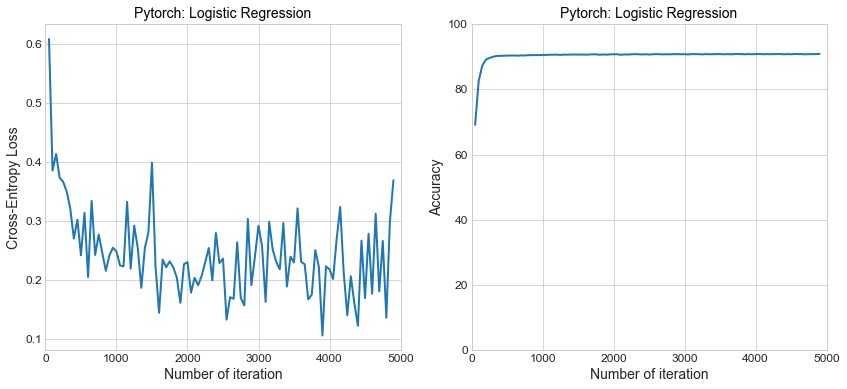

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
_ = ax[0].plot(Iteration_list, loss_list, linewidth=2)
_ = ax[0].set_xlabel("Number of iteration")
_ = ax[0].set_ylabel("Cross-Entropy Loss")
_ = ax[0].set_title("Pytorch: Logistic Regression")
_ = ax[0].set_xlim([0,iteration_number])

_ = ax[1].plot(Iteration_list, Accuracy_list, linewidth=2)
_ = ax[1].set_xlabel("Number of iteration")
_ = ax[1].set_ylabel("Accuracy")
_ = ax[1].set_title("Pytorch: Logistic Regression")
_ = ax[1].set_xlim([0,iteration_number])
_ = ax[1].set_ylim([0,100])
Table = pd.DataFrame({'Iteration':Iteration_list,
                      'Loss': [x.cpu().numpy() for x in loss_list],
                      'Accuracy': [x.cpu().numpy() for x in Accuracy_list]})
display(Table[0:-1:15].style.hide_index())

A confusion matrix allows the visualization of the performance of a classification model.

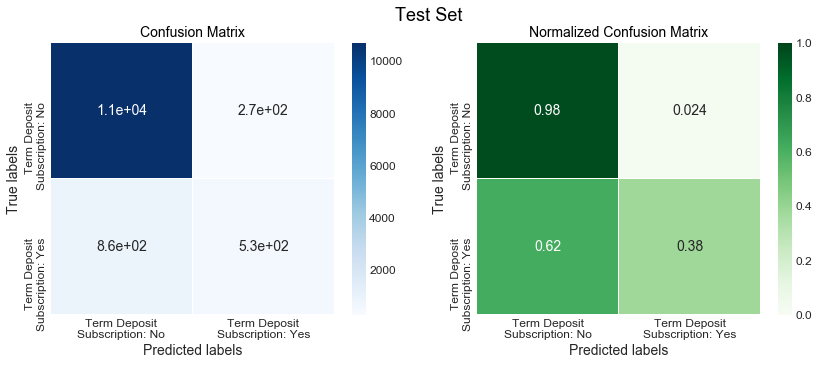

In [29]:
# Test set
Labels = ['Term Deposit\nSubscription: No', 'Term Deposit\nSubscription: Yes']
y_pred = model(X_test_tensor.float()).cpu().data.numpy()
Confusion_Matrix = metrics.confusion_matrix(y_test, y_pred.argmax(axis=1))

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Test Set', fontsize = 18)
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Blues", ax = ax[0],
                linewidths = 0.2, cbar_kws={"shrink": 1})
_ = ax[0].set_xlabel('Predicted labels')
_ = ax[0].set_ylabel('True labels'); 
_ = ax[0].set_title('Confusion Matrix');
_ = ax[0].xaxis.set_ticklabels(Labels)
_ = ax[0].yaxis.set_ticklabels(Labels)

Confusion_Matrix = Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis=1)[:, np.newaxis]
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Greens", ax = ax[1],
               linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": 1})
_ = ax[1].set_xlabel('Predicted labels')
_ = ax[1].set_ylabel('True labels'); 
_ = ax[1].set_title('Normalized Confusion Matrix');
_ = ax[1].xaxis.set_ticklabels(Labels)
_ = ax[1].yaxis.set_ticklabels(Labels)

# Predictions

In [30]:
Sample = df.sample(frac = 0.1)
X_sample = Sample.drop(columns = [Target]).values
X_sample = scaler.transform(X_sample)

if torch.cuda.is_available():
    X_sample_tensor = Variable(torch.from_numpy(X_sample).cuda())
else:
    X_sample_tensor = Variable(torch.from_numpy(X_sample))

Labels = ['No', 'Yes']
y_pred = model(X_sample_tensor.float())
y_pred = np.asarray(y_pred.cpu().detach().numpy())
y_pred = pd.Series(y_pred.argmax(axis=1)).to_frame('Term Deposit Subscription (Predicted)').applymap(lambda x: Labels[0] if x ==0 else  Labels[1])
Predictions = pd.concat([Data, y_pred], axis = 1).dropna(subset = ['Term Deposit Subscription (Predicted)'])
display(Predictions)

Age           Job   Marital          Education  Default Housing Loan  \
0      56     Housemaid   Married           Basic.4Y       No      No   No   
1      57      Services   Married        High.School  Unknown      No   No   
2      37      Services   Married        High.School       No     Yes   No   
3      40        Admin.   Married           Basic.6Y       No      No   No   
4      56      Services   Married        High.School       No      No  Yes   
...   ...           ...       ...                ...      ...     ...  ...   
4114   52  Entrepreneur   Married  University.Degree       No      No   No   
4115   55      Services  Divorced        High.School       No      No  Yes   
4116   24      Services    Single        High.School       No      No   No   
4117   46        Admin.  Divorced        High.School  Unknown      No  Yes   
4118   31        Admin.  Divorced  University.Degree       No      No   No   

        Contact Month Day Of Week  ...  Pdays  Previous     Poutcome  \
0     Telephone   May      Monday  ...    999         0  Nonexistent   
1     Telephone   May      Monday  ...    999         0  Nonexistent   
2     Telephone   May      Monday  ...    999         0  Nonexistent   
3     Telephone   May      Monday  ...    999         0  Nonexistent   
4     Telephone   May      Monday  ...    999         0  Nonexistent   
...         ...   ...         ...  ...    ...       ...          ...   
4114  Telephone   May      Monday  ...    999         0  Nonexistent   
4115  Telephone   May      Monday  ...    999         0  Nonexistent   
4116  Telephone   May      Monday  ...    999         0  Nonexistent   
4117  Telephone   May      Monday  ...    999         0  Nonexistent   
4118  Telephone   May      Monday  ...    999         0  Nonexistent   

      Employment Variation Rate Consumer Price Index  \
0                           1.1               93.994   
1                           1.1               93.994   
2                           1.1               93.994   
3                           1.1               93.994   
4                           1.1               93.994   
...                         ...                  ...   
4114                        1.1               93.994   
4115                        1.1               93.994   
4116                        1.1               93.994   
4117                        1.1               93.994   
4118                        1.1               93.994   

      Consumer Confidence Index  Euribor three Month Rate  \
0                         -36.4                     4.857   
1                         -36.4                     4.857   
2                         -36.4                     4.857   
3                         -36.4                     4.857   
4                         -36.4                     4.857   
...                         ...                       ...   
4114                      -36.4                     4.858   
4115                      -36.4                     4.858   
4116                      -36.4                     4.858   
4117                      -36.4                     4.858   
4118                      -36.4                     4.858   

      Number of Employees  Term Deposit Subscription  \
0                  5191.0                         No   
1                  5191.0                         No   
2                  5191.0                         No   
3                  5191.0                         No   
4                  5191.0                         No   
...                   ...                        ...   
4114               5191.0                         No   
4115               5191.0                         No   
4116               5191.0                         No   
4117               5191.0                         No   
4118               5191.0                         No   

      Term Deposit Subscription (Predicted)  
0                                        No  
1                                

***
# Refrences

* S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

* S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]

***